# Flight Price Prediction


### Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

Task 1:- Prepare a complete data analysis report on the given data.\
Task 2:- Create a predictive model which will help the customers to predict future flight
         prices and plan their journey accordingly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Flight_Fare.csv')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Domain Analysis

* Target/Dependent Features --- Price
* Input/Independent Features--- Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info

This data basically helps us to predict the flight price based on different features 

## Basic Checks

In [4]:
data.shape

(10683, 11)

In [5]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Insights

* The minimum flight price is 1759/-
* The maximum flight price is 79512/-

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.dropna(inplace=True)                        # Removing Null Values

In [13]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
data.duplicated().sum()

220

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(10462, 11)

In [17]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
data['Duration'].value_counts()

Duration
2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [19]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

## Exploratory Data Analysis

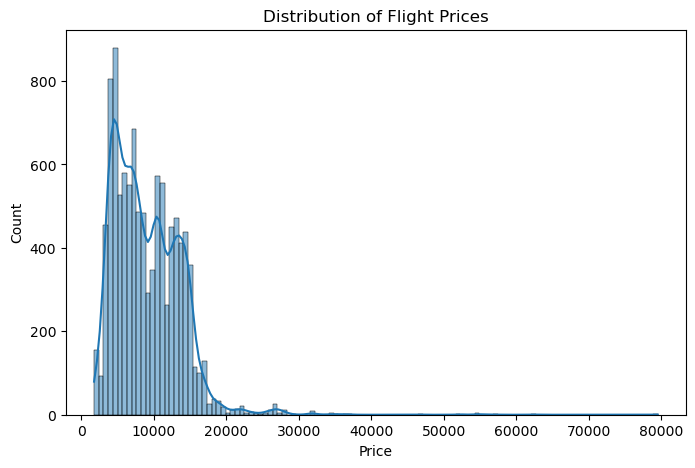

In [20]:
# Plot for Price Distribution --- Histplot
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='Price',kde=True)
plt.title("Distribution of Flight Prices")
plt.show()

<Axes: xlabel='Price Range', ylabel='percent'>

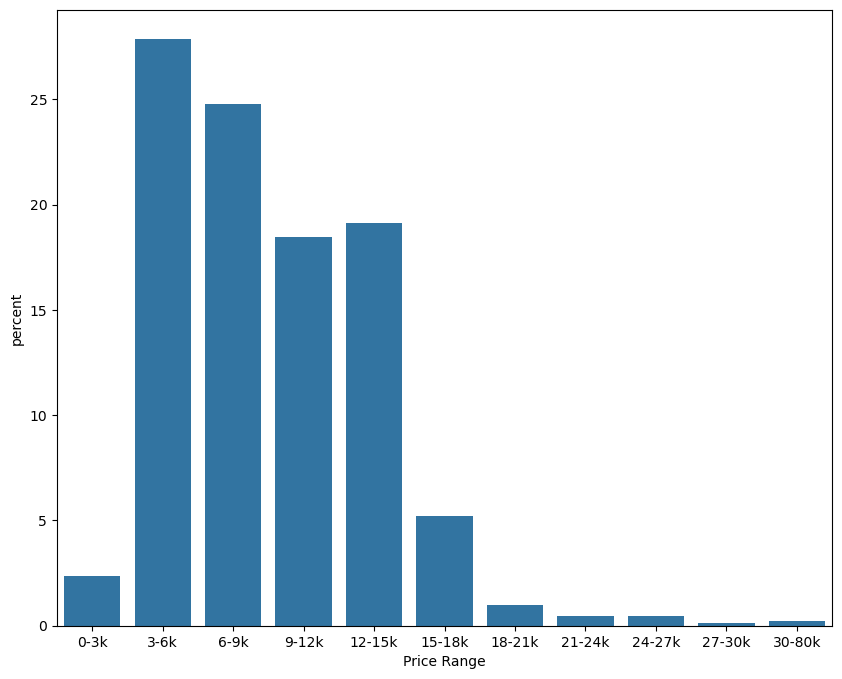

In [21]:
# Analyzing the distribution using labels and bins in Count plot.
labels=['0-3k','3-6k','6-9k','9-12k','12-15k','15-18k','18-21k','21-24k','24-27k','27-30k','30-80k']
bins=[0,3000,6000,9000,12000,15000,18000,21000,24000,27000,30000,80000]

data['Price Range']=pd.cut(data['Price'], labels=labels, bins=bins, include_lowest=True)

plt.figure(figsize=(10,8))
sns.countplot(x='Price Range', data=data, stat='percent')

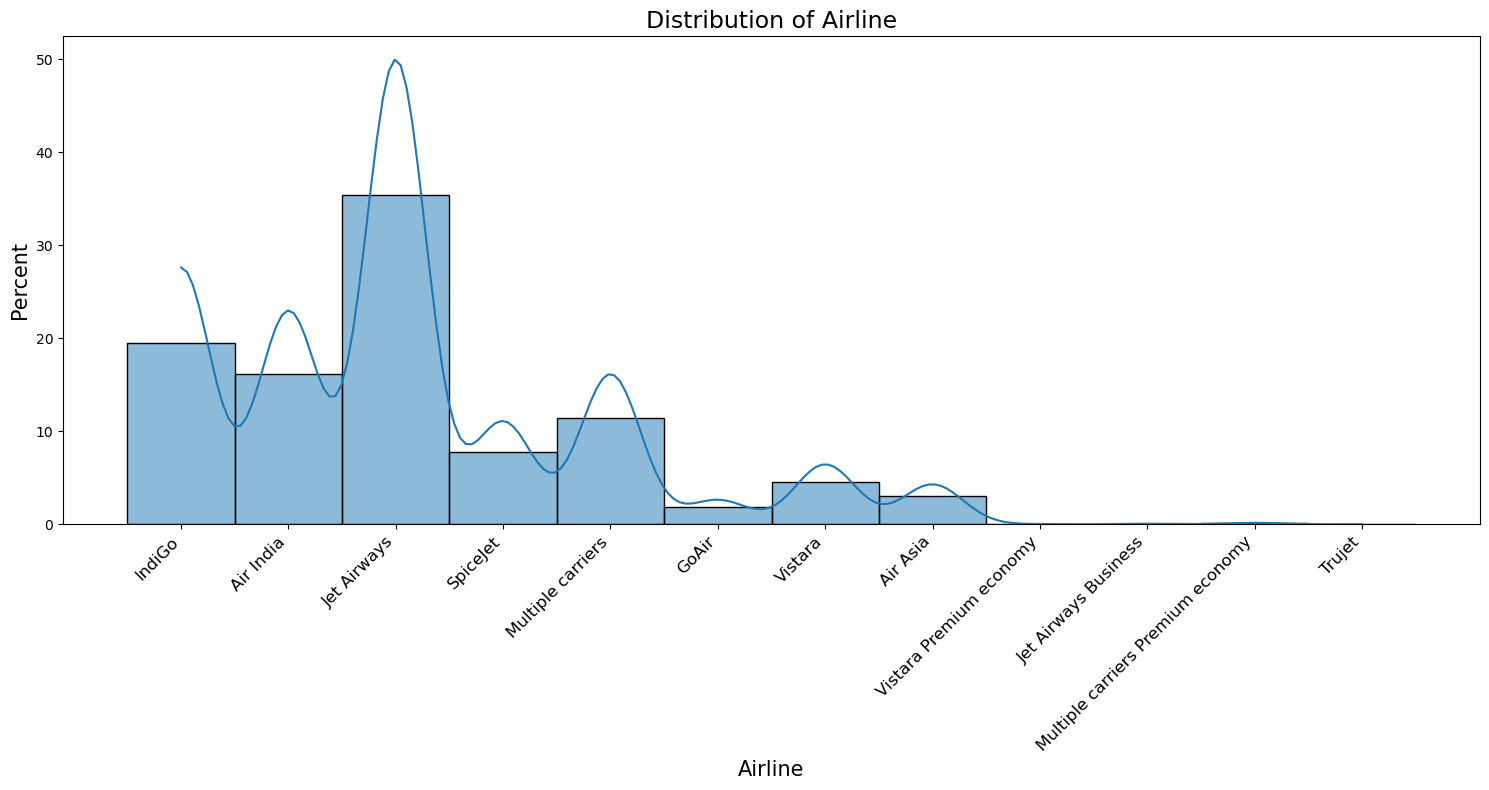

In [22]:
# Plot for Airline Distribution --- Histplot

plt.figure(figsize=(15,8))
sns.histplot(data=data, x='Airline', stat='percent', kde=True)

plt.xticks(rotation=45, ha='right', fontsize=12)   # To Rotate labels
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.title("Distribution of Airline", fontsize=17)
plt.tight_layout()  # Adjusts the layout to prevent cutoff
plt.show()

In [23]:
# Airline vs Price graph

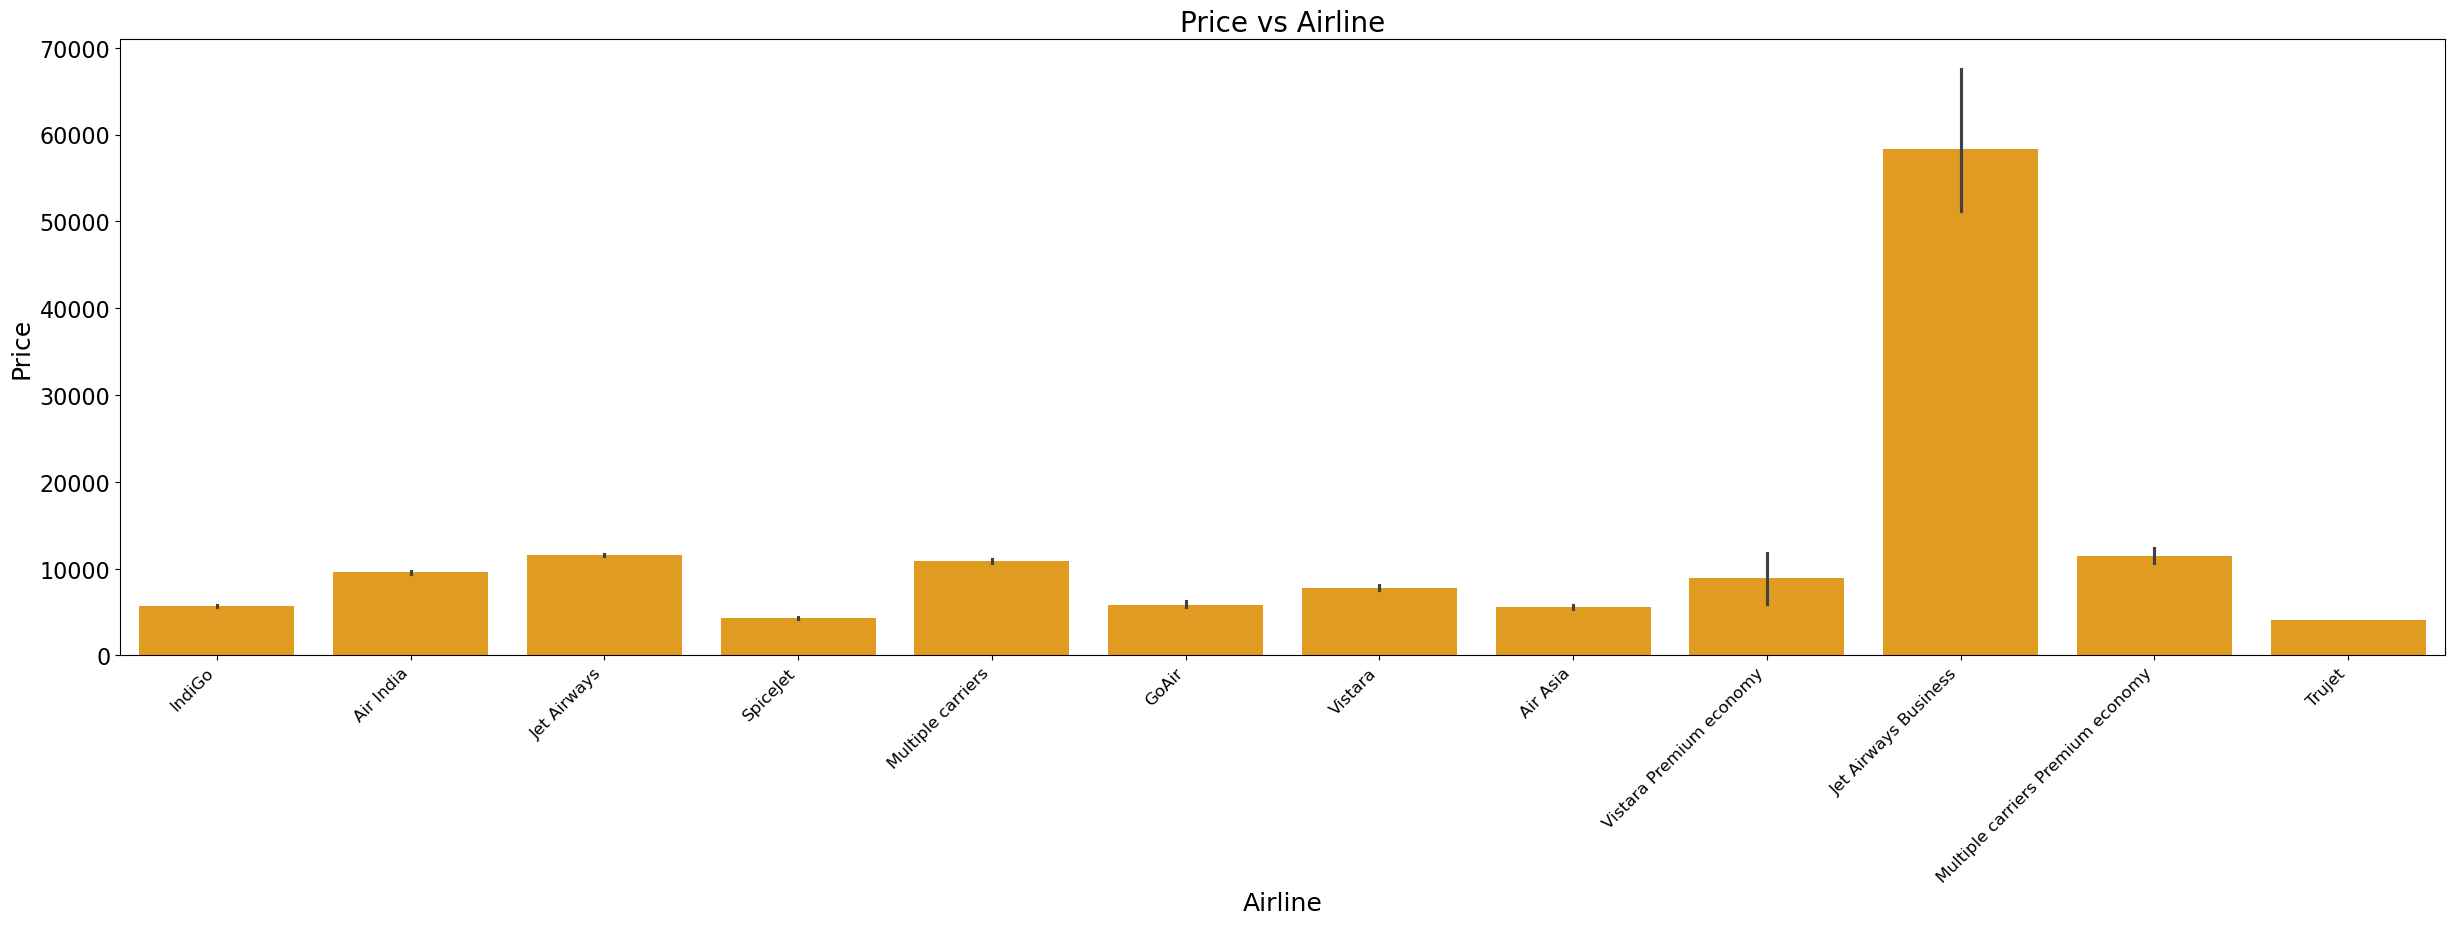

In [24]:
plt.figure(figsize=(30,8))
sns.barplot(data=data,x='Airline',y='Price', color= 'orange')
plt.title('Price vs Airline', fontsize=20)
plt.xlabel('Airline', fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xticks(rotation=45, ha= 'right', fontsize=12)
plt.yticks(fontsize=16)
plt.show()

In [25]:
## Insights

# From the above Airline vs Price graph, we can see that Jet Airways Business have the highest price and the SpiceJet and Trujet have the lowest.

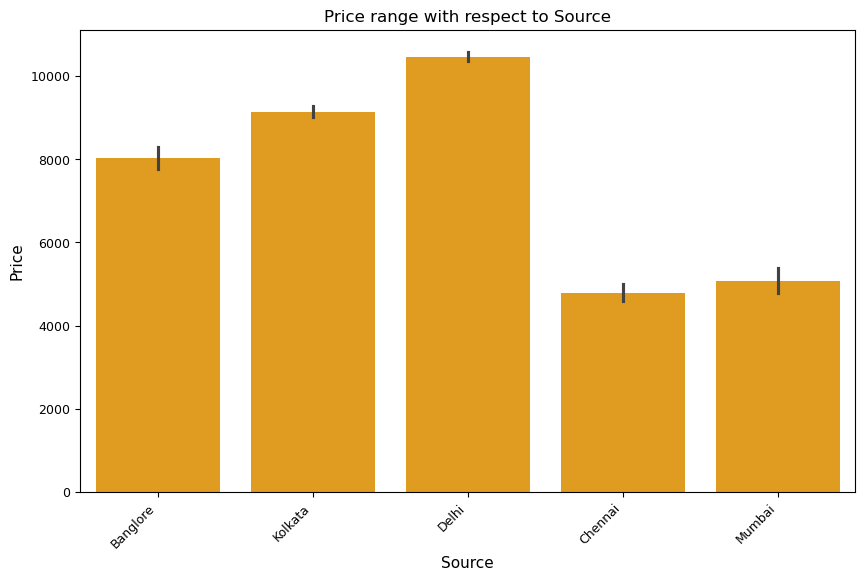

In [26]:
# Source vs Price graph

plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Source',y='Price',color='orange')
plt.title('Price range with respect to Source', fontsize=12)
plt.xlabel('Source', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [27]:
## Insights

# From the above graph, we can say that the source flights from Delhi is having the highest flight prices and Chennai is having lowest price.

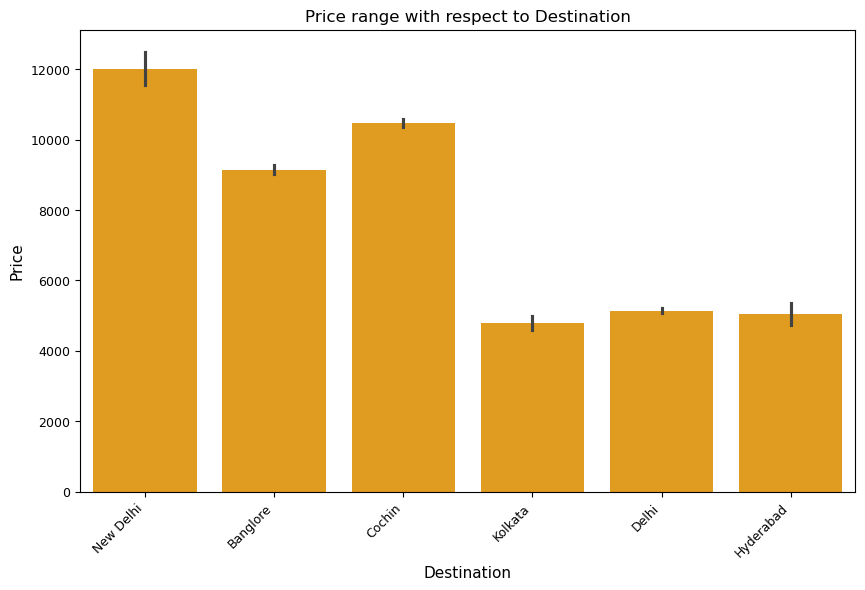

In [28]:
# Destination vs Price graph

plt.figure(figsize=(10,6))
sns.barplot(data=data,x='Destination',y='Price', color= 'orange')
plt.title('Price range with respect to Destination', fontsize=12)
plt.xlabel('Destination', fontsize=11)
plt.ylabel('Price',fontsize=11)
plt.xticks(rotation=45, ha= 'right', fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [29]:
## Insights

# From the above graph, we can say that the destinations New Delhi and Cochin are having almost similar prices, New Delhi is having few higher 
# priced flights compared to Cochin. 

# Delhi is having least priced flights compared to all.

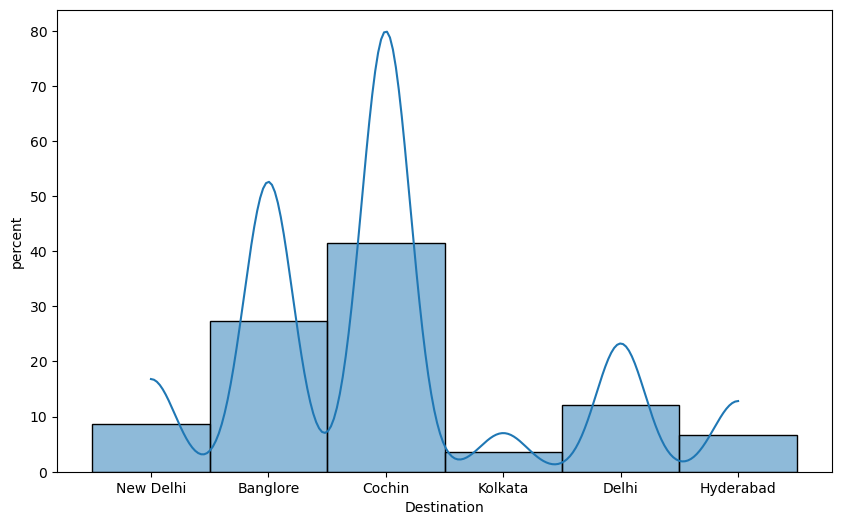

In [30]:
# Histplot for Destination

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Destination', stat='percent', kde=True)
plt.xlabel('Destination')
plt.ylabel('percent')
plt.show()

In [31]:
# Insights

# From the above graph we can say that around 40% of people are travelling to Cochin and 25-30% are travelling to Bangalore.  

## Feature Engineering

 From the data, we can see that Date_of_Journey column is a object datatype,\
 Therefore we have to convert this datatype into timestamp in order to use this for prediction.

 To convert object datatype into datetime datatype, we require pandas to_datetime.

 .dt.day will extract only day of that Date_of_Journey.\
 .dt.month will extract only month of that Date_of_Journey.\
 For the Year, here we are having data of only one year which is 2019.

In [32]:
data['Journey_day']=pd.to_datetime(data['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [33]:
data['Journey_month']=pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [34]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Price Range,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3-6k,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,6-9k,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,12-15k,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,6-9k,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,12-15k,1,3


In [35]:
# Since we have converted Date_of_Journey column into integers datatype, we can drop that column as it is of no use.

data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [36]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Price Range,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3-6k,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,6-9k,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,12-15k,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,6-9k,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,12-15k,1,3


 Similar to Date_of_Journey, we have to work with few other columns like\
 Dep_Time, Arrival_Time and Duration\
 to convert them from object datatype to int datatype.

In [37]:
## Departure time is when a plane leaves.
# Now, we have to extract Hours and Minutes from the Dep_Time column.

data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour

In [38]:
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [39]:
# Now we can drop Dep_Time column as there is no use of it

data.drop(['Dep_Time'], axis=1, inplace=True)

In [40]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Price Range,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3-6k,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,6-9k,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,12-15k,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,6-9k,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,12-15k,1,3,16,50


In [41]:
## Arrival Time is when a plane arrives to the destination.
# Now, we have to extract Hours and Minutes from Arrival_Time column.

data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour

In [42]:
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [43]:
# Now we can drop Arrival_Time column.

data.drop(['Arrival_Time'], axis=1, inplace=True)

In [44]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Price Range,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3-6k,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,6-9k,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,12-15k,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,6-9k,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,12-15k,1,3,16,50,21,35


In [45]:
##  Duration is the journey time or the time taken by plane to reach the destination.
# Now, we have to extract Hours and Minutes from Duration column.

data['Duration_hour']= data['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)

In [46]:
# Create Minutes column (extracting value before 'm')
data['Duration_min']=data['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)

In [47]:
# Now we can drop Duration column

data.drop(['Duration'], axis=1, inplace=True)

In [48]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Price Range,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3-6k,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,6-9k,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,12-15k,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,6-9k,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,12-15k,1,3,16,50,21,35,4,45


In [49]:
data.drop(['Price Range'], axis=1, inplace=True)

## Handling Categorical Data - Encoding

In [50]:
data['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [51]:
data['Airline']= data['Airline'].map({'Jet Airways': 0, 'IndiGo': 1, 'Air India': 2, 'Multiple carriers': 3, 'SpiceJet': 4, 'Vistara': 5,
                                     'Air Asia': 6, 'GoAir': 7, 'Multiple carriers Premium economy': 8, 'Jet Airways Business': 9,
                                     'Vistara Premium economy': 10, 'Trujet': 11})

In [52]:
data['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [53]:
data['Destination']= data['Destination'].map({'Cochin': 0, 'Banglore': 1, 'Delhi': 2, 'New Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5})

In [54]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,1,Banglore,3,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,2,Kolkata,1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,0,Delhi,0,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,1,Kolkata,1,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,1,Banglore,3,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [55]:
data['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [56]:
data['Source']= data['Source'].map({'Delhi': 0, 'Kolkata': 1, 'Banglore': 2, 'Mumbai': 3, 'Chennai': 4})

In [57]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,1,2,3,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,2,1,1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,1,1,1,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,1,2,3,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [58]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [59]:
data['Total_Stops']= data['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [60]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,1,2,3,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,2,1,1,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,1,1,1,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,1,2,3,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [61]:
data['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [62]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [63]:
data.drop(['Route','Additional_Info'], axis=1, inplace= True)

In [64]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,1,2,3,0,3897,24,3,22,20,1,10,2,50
1,2,1,1,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,1,1,1,1,6218,12,5,18,5,23,30,5,25
4,1,2,3,1,13302,1,3,16,50,21,35,4,45


In [65]:
data.shape

(10462, 13)

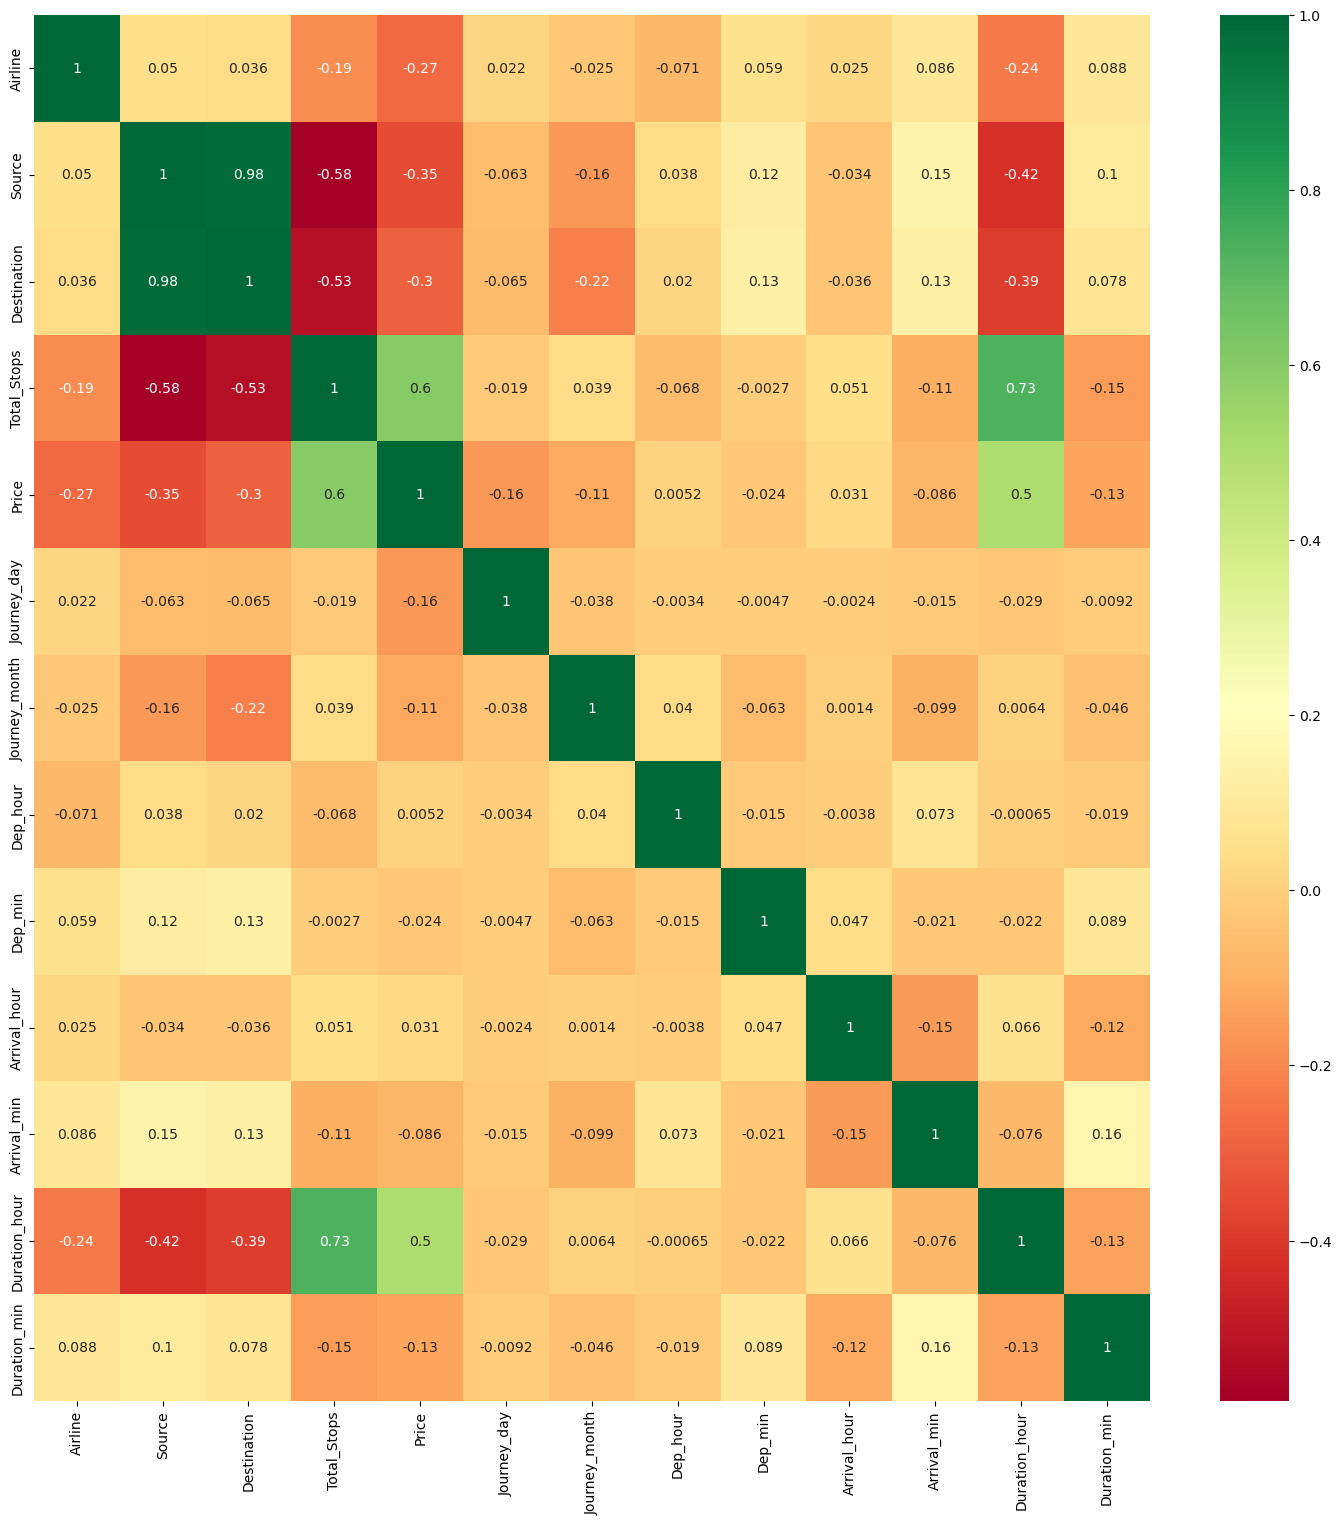

In [66]:
# Correlation between Independent and Dependent features

plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")      #cmap is for color of the map
plt.show()

In [67]:
## Insights
# Price has moderate correlation with Total Stops and Duration.
# Total Stops and Duration_hour are moderately correlated.

In [68]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,1,2,3,0,3897,24,3,22,20,1,10,2,50
1,2,1,1,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,1,1,1,1,6218,12,5,18,5,23,30,5,25
4,1,2,3,1,13302,1,3,16,50,21,35,4,45


In [69]:
data.shape

(10462, 13)

## Removing Outliers

<Axes: xlabel='Price'>

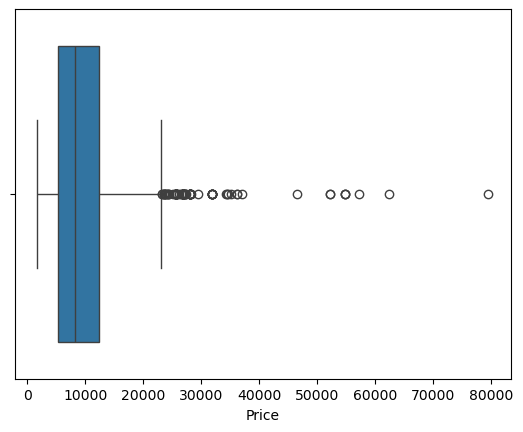

In [70]:
## Checking Outliers for the Target value/Dependent feature with the help of Boxplot.

sns.boxplot(data=data, x='Price')

In [71]:
## We can see that there are some Outliers. They can be removed by using IQR Method.

In [72]:
## IQR Method:

q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)

In [73]:
q1,q3

(5224.0, 12344.75)

In [74]:
IQR = q3-q1
IQR

7120.75

In [75]:
upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR
upper_bound, lower_bound

(23025.875, -5457.125)

In [76]:
# Outliers are the values which are less than the lower_bound and higher than the upper_bound.
# Removing Outliers and keep only non outliers

data= data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

Text(0.5, 1.0, 'Boxplot after removing Outliers')

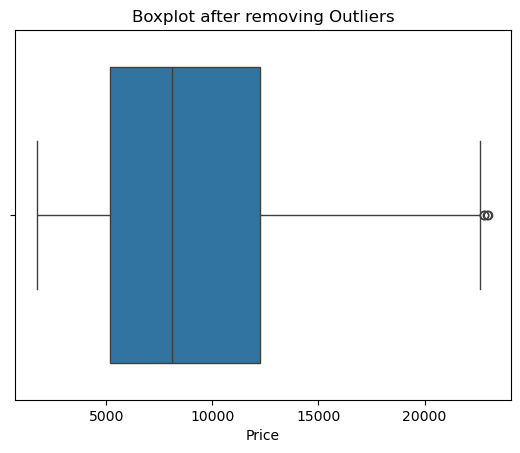

In [77]:
# Boxplot after removing Outliers

sns.boxplot(data=data, x='Price')
plt.title('Boxplot after removing Outliers')

In [78]:
data.shape

(10368, 13)

# Model Building

### Split data into Training and Testing sets

In [79]:
# Splitting data into X and y  i.e., Independent and Dependent variable
X= data.drop(['Price'], axis=1)

In [80]:
y= data['Price']

In [81]:
X.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,1,2,3,0,24,3,22,20,1,10,2,50
1,2,1,1,2,1,5,5,50,13,15,7,25
2,0,0,0,2,9,6,9,25,4,25,19,0
3,1,1,1,1,12,5,18,5,23,30,5,25
4,1,2,3,1,1,3,16,50,21,35,4,45


In [82]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection

We understood that it is a Regression problem for which we have to predict Flight price. \
So we can use Tree based Algorithms such as 'Decision Tree Regressor', 'Random Forest Regressor'. \
Compare values of both the models and keep the best one to predict the values.

## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [85]:
# To make predictions

y_pred_dt= dt.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [87]:
print("Decision Tree")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree
R2 Score: 0.6903278976024106
MAE: 1325.7982160077145
MSE: 5026762.391199508
RMSE: 2242.0442438095433


## Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [89]:
y_pred_rf =rf.predict(X_test)

In [90]:
print("Random Forest")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest
R2 Score: 0.8096867238885685
MAE: 1126.0705410983753
MSE: 3089266.393375829
RMSE: 1757.6309036244866


# Hyperparameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
""" Tuning Decision Tree """


dt=DecisionTreeRegressor(random_state=42)
param_dt= {'max_depth':[None,2,10,15],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,5]}
grid_dt= GridSearchCV(dt, param_dt, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train, y_train)

best_dt= grid_dt.best_estimator_
y_pred_dt_tuned= best_dt.predict(X_test)

In [93]:
print("Decision Tree -- Tuned")
print("R2 Score:", r2_score(y_test, y_pred_dt_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_dt_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_dt_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_tuned)))

Decision Tree -- Tuned
R2 Score: 0.7960546581222213
MAE: 1278.3552309103336
MSE: 3310549.34065486
RMSE: 1819.4915060683466


In [94]:
""" Tuning Random Forest """


rf= RandomForestRegressor(random_state=42)
param_rf={'n_estimators': [100,200,300],
            'max_depth': [None,10,20],
            'min_samples_split': [2,5,10]}
grid_rf= GridSearchCV(rf, param_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

best_rf= grid_rf.best_estimator_
y_pred_rf_tuned= best_rf.predict(X_test)
grid_rf.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}

In [95]:
print("Random Forest -- Tuned")
print("R2 Score:", r2_score(y_test, y_pred_rf_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_rf_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_rf_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)))

Random Forest -- Tuned
R2 Score: 0.8399591650444547
MAE: 1070.7228957201814
MSE: 2597868.0158208692
RMSE: 1611.7903138500583


## Actual vs Predicted graphs

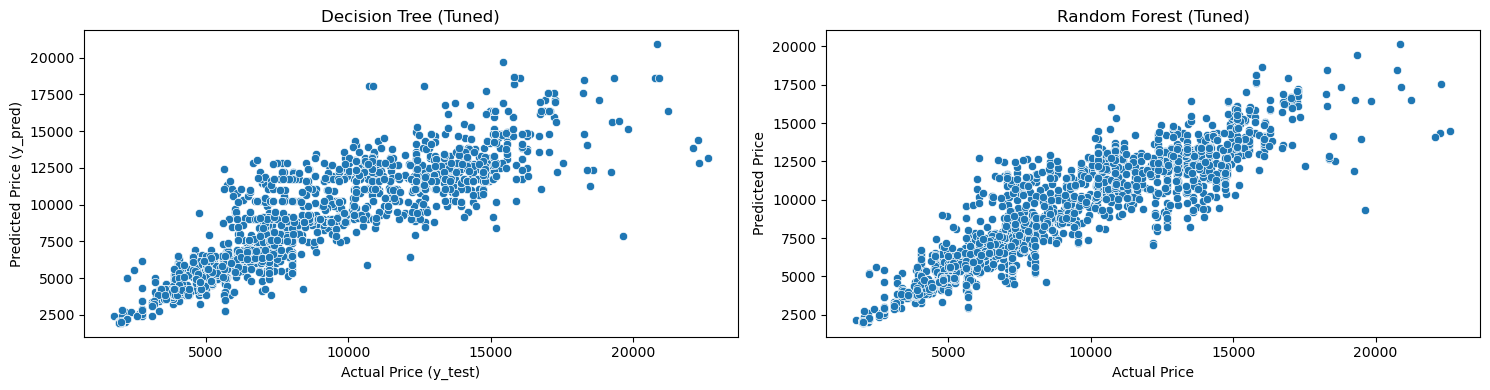

In [96]:
plt.figure(figsize=(15,4))

## Plot for Decision Tree -- Tuned
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_dt_tuned)
plt.xlabel('Actual Price (y_test)')
plt.ylabel('Predicted Price (y_pred)')
plt.title('Decision Tree (Tuned)')

## Plot for Random Forest -- Tuned
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_rf_tuned)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest (Tuned)')

plt.tight_layout()
plt.show()

### Model Performance Comparision

In [97]:
results={'Model':['Decision Tree','Decision Tree (Tuned)','Random Forest','Random Forest (Tuned)'],
         'R2_score': ['0.6903','0.8096','0.7960','0.8399'],
         'MAE': ['1325.79','1126.07','1278.35','1070.72'],
         'RMSE': ['2242.04','1757.63','1819.49','1611.79']}

In [98]:
compare_results= pd.DataFrame(results)

In [99]:
compare_results

,Model,R2_score,MAE,RMSE
0,Decision Tree,0.6903,1325.79,2242.04
1,Decision Tree (Tuned),0.8096,1126.07,1757.63
2,Random Forest,0.7960,1278.35,1819.49
3,Random Forest (Tuned),0.8399,1070.72,1611.79


## Save the best model

In [100]:
## Save the best model i.e., Random Forest to reuse it again.

In [6]:
import pickle

In [107]:
# Open a file where you want to store the data and dump information into that file

with open('flight_rf.pkl', 'wb') as f:
    pickle.dump(best_rf,f)

print('Tuned RF model saved as flight_rf.pkl')

Tuned RF model saved as flight_rf.pkl


In [7]:
## Load the model from file

with open('flight_rf.pkl', 'rb') as f:
    loaded_model=pickle.load(f)

# Predicting Flight Price

In [4]:
## Select  ---    Airline --> 'Jet Airways': 0, 'IndiGo': 1, 'Air India': 2, 'Multiple carriers': 3, 'SpiceJet': 4, 'Vistara': 5, 'Air Asia': 6,
#                            GoAir': 7, 'Multiple carriers Premium economy': 8, 'Jet Airways Business': 9, 'Vistara Premium economy': 10, 'Trujet': 11
#                                     
#                 Source --> 'Delhi': 0, 'Kolkata': 1, 'Banglore': 2, 'Mumbai': 3, 'Chennai': 4
#                 Destination --> 'Cochin': 0, 'Banglore': 1, 'Delhi': 2, 'New Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5
#                 Total_Stops --> 'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4

In [115]:
test_data = pd.DataFrame({
    'Airline': [0, 1, 4],
    'Source': [2, 3, 0],
    'Destination': [4, 5, 0],
    'Total_Stops': [0, 1, 2],
    'Journey_day': [12, 22, 4],
    'Journey_month': [3, 6, 11],  
    'Dep_hour': [10, 18, 6],
    'Dep_min': [30, 45, 15],
    'Arrival_hour': [13, 21, 12],
    'Arrival_min': [15, 30, 50],
    'Duration_hour': [3, 3, 6],
    'Duration_min': [45, 75, 65]})

In [116]:
test_data

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,0,2,4,0,12,3,10,30,13,15,3,45
1,1,3,5,1,22,6,18,45,21,30,3,75
2,4,0,0,2,4,11,6,15,12,50,6,65


In [117]:
# Making Predictions
predicted_price = loaded_model.predict(test_data)
print("Predicted Flight Fares:", predicted_price)

Predicted Flight Fares: [9562.94532055 8601.05690996 9616.60165302]


# Final Report

In [ ]:
##  Predictions:

In [9]:
test_data = pd.DataFrame({
    'Airline': [0, 2],
    'Source': [1, 4],
    'Destination': [2, 1],
    'Total_Stops': [1, 0],
    'Journey_day': [14, 25],
    'Journey_month': [1, 12],  
    'Dep_hour': [7, 14],
    'Dep_min': [40, 30],
    'Arrival_hour': [12, 15],
    'Arrival_min': [30, 45],
    'Duration_hour': [5, 1],
    'Duration_min': [70, 75]})

In [10]:
test_data

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,0,1,2,1,14,1,7,40,12,30,5,70
1,2,4,1,0,25,12,14,30,15,45,1,75


In [11]:
pred_price=loaded_model.predict(test_data)
print("Predicted Price:", pred_price)

Predicted Price: [11500.18239624  3400.03669539]
